In [3]:
library(mdsr)
library(ggplot2)
library(mosaic)
library(dplyr)
library(mosaic)
library(randomForest)
COMBINED_DATA<-read.csv('CombinedData3 - CombinedData.csv.csv')
COMBINED_DATA$Country <- as.character(COMBINED_DATA$Country)
COMBINED_DATA$Country[COMBINED_DATA$Country=="United Kingdom"]<-"UK"
COMBINED_DATA$Country[COMBINED_DATA$Country=="United States of America"]<-"USA"
glimpse(COMBINED_DATA)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
combine(): dplyr, randomForest
filter():  dplyr, stats
lag():     dplyr, stats
margin():  ggplot2, randomForest
Loading required package: lattice
Loading required package: ggformula

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the Matrix package, be sure to load it BEFORE loading mosaic.


Observations: 224
Variables: 15
$ Year         <int> 1960, 1960, 1960, 1960, 1961, 1961, 1961, 1961, 1962, ...
$ Country      <chr> "Canada", "Sweden", "UK", "USA", "Canada", "Sweden", "...
$ Population   <int> 17909009, 7484656, 52400000, 180671000, 18271000, 7519...
$ Type         <fctr> Refugees (incl. refugee-like situations), Refugees (i...
$ RefugeeCount <int> 48629, 26000, 167000, 500000, 44492, 26000, 164000, 50...
$ PercentCount <dbl> 0.27153373, 0.34737735, 0.31870229, 0.27674613, 0.2435...
$ gov_right1   <dbl> 100.00, 0.00, 100.00, 92.31, 100.00, 0.00, 100.00, 11....
$ gov_cent1    <dbl> 0.00, 0.00, 0.00, 7.69, 0.00, 0.00, 0.00, 88.88, 0.00,...
$ gov_left1    <dbl> 0.00, 93.21, 0.00, 0.00, 0.00, 92.86, 0.00, 0.00, 0.00...
$ gov_right2   <dbl> 100.00, 0.00, 100.00, 100.00, 100.00, 0.00, 100.00, 5....
$ gov_cent2    <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 94.79, 0.00,...
$ gov_left2    <dbl> 0.00, 100.00, 0.00, 0.00, 0.00, 100.00, 0.00, 0.00, 0....
$ Right        <dbl>

## Figure 1. Raw refugee counts from 1960 to 2015 for UK, US, Canada, and Sweden. 

`geom_smooth()` using method = 'loess'


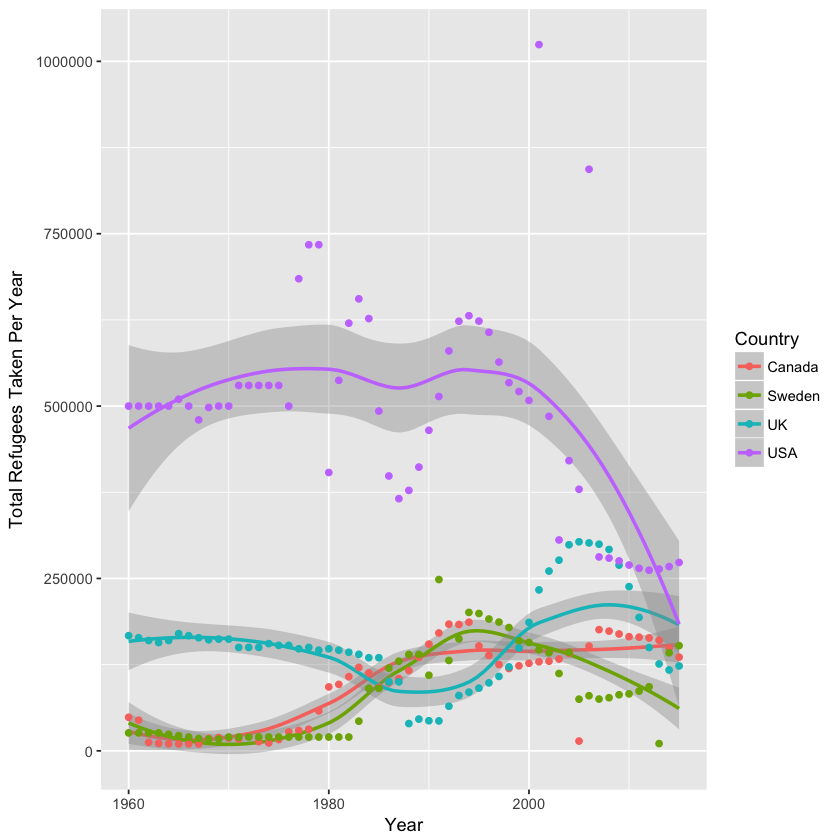

In [3]:
ggplot(data = COMBINED_DATA, aes(x = Year, y=RefugeeCount, col = Country))+
ylab("Total Refugees Taken Per Year")+ geom_smooth()+ geom_point()

## Figure 2. Figure 2: Refugee counts in US, UK, Canada, and Sweden normalized to the corresponding host country’s original population size from 1960 to 2015. 

`geom_smooth()` using method = 'loess'


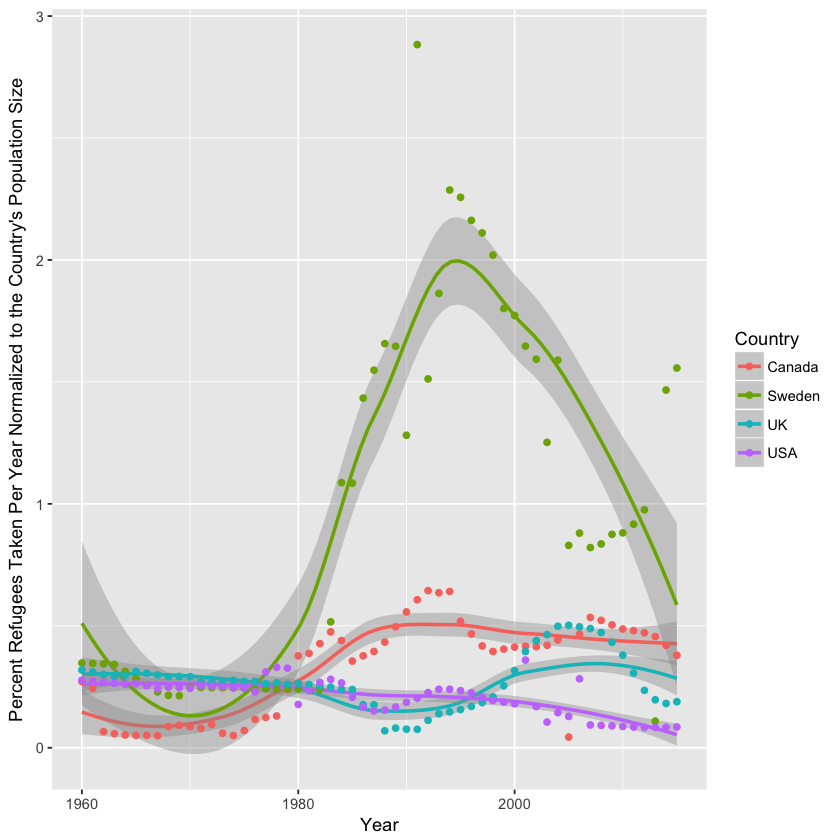

In [4]:
ggplot(data = COMBINED_DATA, aes(x = Year, y=PercentCount, col = Country))+
ylab("Percent Refugees Taken Per Year Normalized to the Country's Population Size")+geom_smooth()+
geom_point()

## Figure 3: Political composition (right-, center-, and left-wing) of the four countries in the cabinet and parliament combined (‘WingPercentage’) from 1960 to 2015.

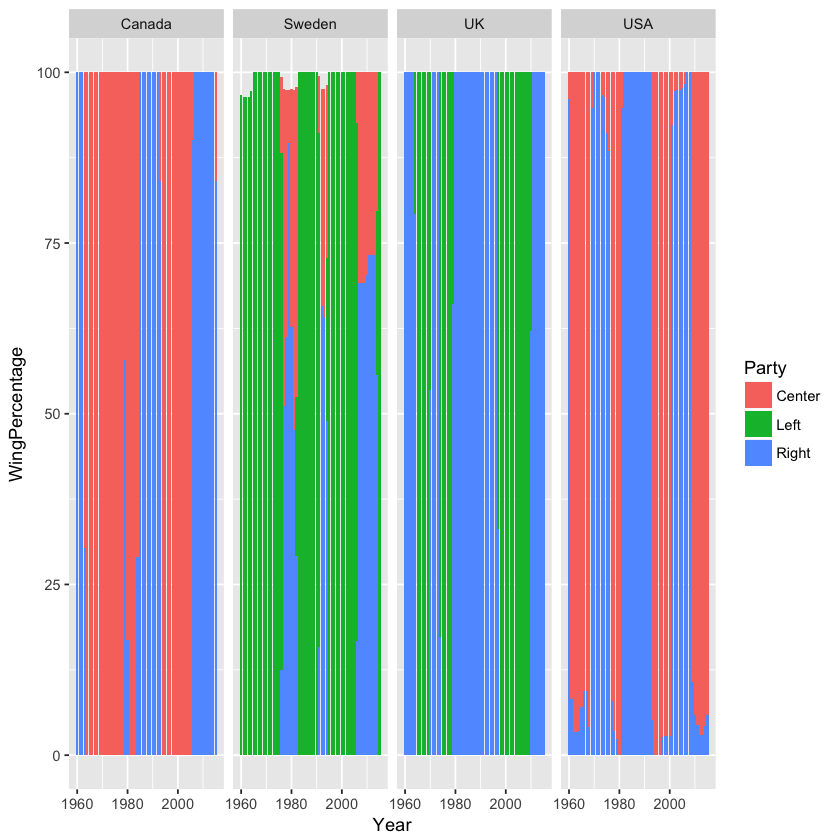

In [5]:
Party<-select(COMBINED_DATA,Left)
names(Party)[1]<-"Party"
Party[1]<-"Left"
CombinedDataLeft<-cbind(COMBINED_DATA,
Party)
CombinedDataLeft<-select(CombinedDataLeft,"Year","RefugeeCount","Left","Party","Country")

Party<-select(COMBINED_DATA,Right)
names(Party)[1]<-"Party"
Party[1]<-"Right"
CombinedDataRight<-cbind(COMBINED_DATA,
Party)
CombinedDataRight<-select(CombinedDataRight,"Year","RefugeeCount","Right","Party","Country")
Party<-select(COMBINED_DATA,Center)
names(Party)[1]<-"Party"
Party[1]<-"Center"
CombinedDataCenter<-cbind(COMBINED_DATA,
Party)
CombinedDataCenter<-select(CombinedDataCenter,"Year","RefugeeCount","Center","Party","Country")
CombinedDataRight<-rename(CombinedDataRight, Cabinet_Percentage=Right)
CombinedDataCenter<-rename(CombinedDataCenter, Cabinet_Percentage=Center)
CombinedDataLeft<-rename(CombinedDataLeft,Cabinet_Percentage=Left)
PolComposition<-rbind(CombinedDataRight, CombinedDataCenter, CombinedDataLeft)
PolComposition<-rename(PolComposition, WingPercentage = Cabinet_Percentage)
ggplot(PolComposition,aes(y=WingPercentage,x=Year,fill=Party))+
geom_bar(stat = "identity", position = "stack")+
facet_grid(.~Country)

## Figure 4: Raw refugee counts for UK, US, Canada, and Sweden faceted by the years when Right, Left, or Center were the majority (greater than 50%). 

`geom_smooth()` using method = 'loess'


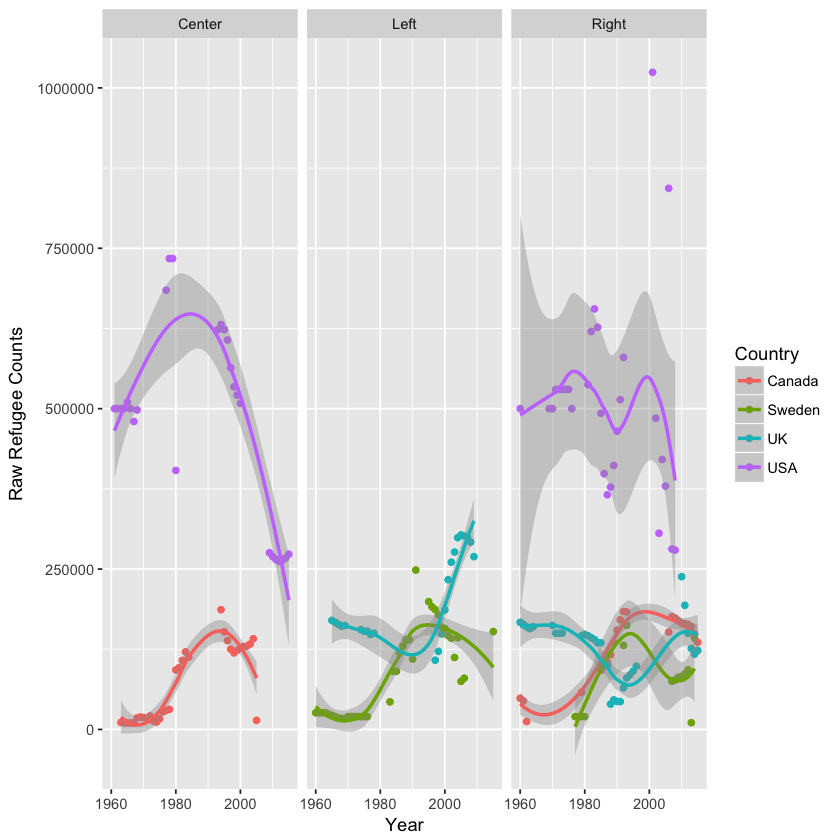

In [9]:
RightData <- filter(COMBINED_DATA, Right>=50)
Party<-select(RightData,Right)
names(Party)[1]<-"Party"
Party[1]<-"Right"
RightData<-cbind(RightData,Party)
RightData<-select(RightData,"Year","RefugeeCount","PercentCount","Right","Party", "Country")
LeftData <- filter(COMBINED_DATA, Left>=50)
Party<-select(LeftData,Left)
names(Party)[1]<-"Party"
Party[1]<-"Left"
LeftData<-cbind(LeftData,
Party)
LeftData<-select(LeftData,"Year","RefugeeCount","PercentCount","Left","Party","Country")
CenterData <- filter(COMBINED_DATA, Center>=50)
Party<-select(CenterData,Center)
names(Party)[1]<-"Party"
Party[1]<-"Center"
CenterData<-cbind(CenterData,
Party)
CenterData<-select(CenterData,"Year","RefugeeCount","PercentCount","Center","Party","Country")
RightData<-rename(RightData,Cabinet_Percentage=Right)
LeftData<-rename(LeftData,Cabinet_Percentage=Left)
CenterData<-rename(CenterData,Cabinet_Percentage=Center)
PolCompRefugeeCounts<-rbind(RightData, LeftData, CenterData)
ggplot(PolCompRefugeeCounts, aes(x = Year, y = RefugeeCount, col = Country))+
geom_point()+geom_smooth()+facet_grid(.~Party)+ylab("Raw Refugee Counts")

## Figure 5: Normalized refugee counts for UK, US, Canada, and Sweden faceted by the years when Right, Left, or Center were in a majority. 

`geom_smooth()` using method = 'loess'


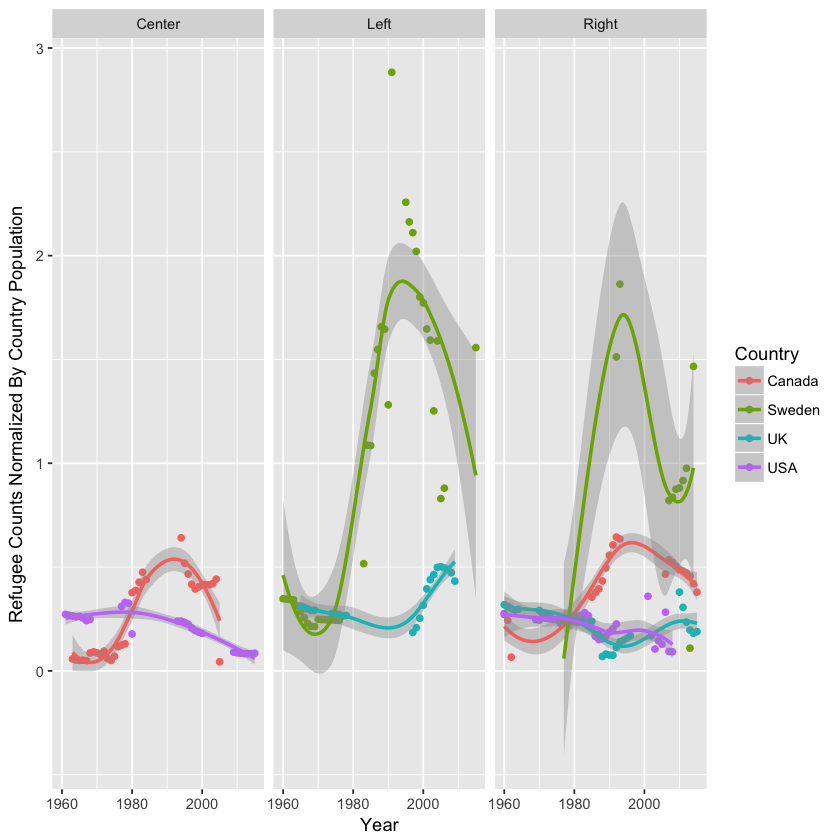

In [11]:
ggplot(PolCompRefugeeCounts, aes(x = Year, y = PercentCount, col = Country))+
geom_point()+geom_smooth()+facet_grid(.~Party)+ylab("Refugee Counts Normalized By Country Population")

## Figure 6: Regression tree used to predict normalized refugee counts for all four countries combined. 

set.seed(364) 
n <- nrow(COMBINED_DATA) 
test_idx <- sample.int(n, size = round(0.1 * n)) 
train <- COMBINED_DATA[-test_idx, ] 
nrow(train)
test <-  COMBINED_DATA[test_idx, ]
nrow(test) 
library(mosaic)
#tally(~Count, data = train, format = "percent")
library(rpart) 
rpart(PercentCount ~ ., data = train)
form <- as.formula("PercentCount ~ Country + Population + Year ")
mod_tree <- rpart(form, data = train) 
mod_tree
library(partykit) 
plot(as.party(mod_tree))
#install.packages("rpart.plot", repos='http://cran.us.r-project.org')
#install.packages("rattle", repos='http://cran.us.r-project.org')
#install.packages("RGtk2", repos='http://cran.us.r-project.org')
library(rpart.plot)
#plot(as.party(mod_tree))
tree.1 <- rpart(form,data=train,control=rpart.control(maxsplit=3,cp=0))
prp(tree.1)

## Figure 7: Variable importance scores for the variables most predictive of normalized refugee counts for  Sweden, UK,  US, Canada and four countries combined.


Call:
 randomForest(formula = PercentCount ~ gov_right1 + gov_right2 +      Right + gov_left1 + gov_left2 + Left + gov_cent1 + gov_cent2 +      Center + Year, data = train, ntree = 200, mtry = 3, na.action = na.exclude) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 3

          Mean of squared residuals: 0.1288119
                    % Var explained: 49.05

rowname,IncNodePurity
Year,11.149712
gov_left1,4.440630
gov_left2,4.429890
Left,4.025995
gov_cent2,2.883435
Center,2.416783
gov_right2,2.124995
gov_cent1,1.889065
Right,1.702568
gov_right1,1.580317


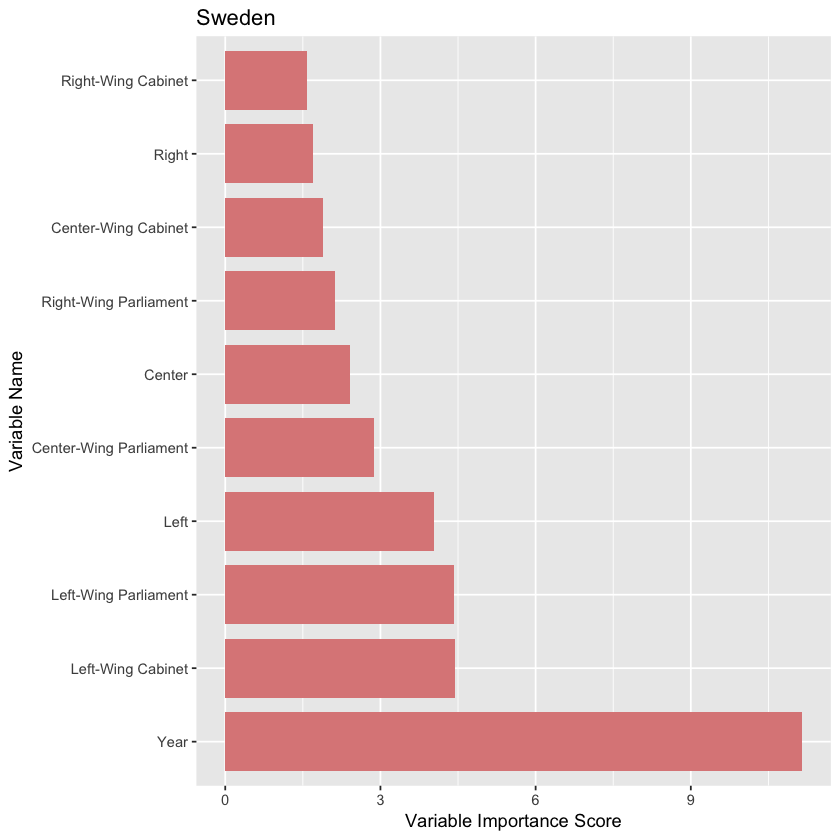

In [6]:
mod_forestCombined
library(tibble)
importance(mod_forestCombined)%>%
as.data.frame()%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))
df1 <- as.data.frame(importance(mod_forestCombined))%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))
#ggplot(df1, aes(x= rowname, y= IncNodePurity))+
#geom_point()
df1$rowname[df1$rowname=="gov_left1"]<-"Left-Wing Cabinet"
df1$rowname[df1$rowname=="gov_left2"]<-"Left-Wing Parliament"
df1$rowname[df1$rowname=="gov_right1"]<-"Right-Wing Cabinet"
df1$rowname[df1$rowname=="gov_right2"]<-"Right-Wing Parliament"
df1$rowname[df1$rowname=="gov_cent1"]<-"Center-Wing Cabinet"
df1$rowname[df1$rowname=="gov_cent2"]<-"Center-Wing Parliament"

ggplot(df1, aes(x=reorder(rowname, -IncNodePurity), y=IncNodePurity))+
geom_bar(fill="#DD8888", width = 0.8, stat = "identity")+
coord_flip()+
ylab("Variable Importance Score")+
xlab("Variable Name") + ggtitle("Sweden")

Observations: 56
Variables: 15
$ Year         <int> 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, ...
$ Country      <chr> "UK", "UK", "UK", "UK", "UK", "UK", "UK", "UK", "UK", ...
$ Population   <int> 52400000, 52800000, 53250000, 53650000, 54000000, 5434...
$ Type         <fctr> Refugees (incl. refugee-like situations), Refugees (i...
$ RefugeeCount <int> 167000, 164000, 160000, 157000, 160000, 170000, 167000...
$ PercentCount <dbl> 0.3187023, 0.3106061, 0.3004695, 0.2926375, 0.2962963,...
$ gov_right1   <dbl> 100.00, 100.00, 100.00, 100.00, 79.23, 0.00, 0.00, 0.0...
$ gov_cent1    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ gov_left1    <dbl> 0.00, 0.00, 0.00, 0.00, 20.77, 100.00, 100.00, 100.00,...
$ gov_right2   <dbl> 100.00, 100.00, 100.00, 100.00, 79.23, 0.00, 0.00, 0.0...
$ gov_cent2    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ gov_left2    <dbl> 0.00, 0.00, 0.00, 0.00, 20.77, 100.00, 100.00, 100.00,...
$ Right        <dbl> 

[1] 50

[1] 6


Call:
 randomForest(formula = PercentCount ~ gov_right1 + gov_right2 +      Right + gov_left1 + gov_left2 + Left + gov_cent1 + gov_cent2 +      Center + Year, data = trainUK, ntree = 200, mtry = 3, na.action = na.exclude) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 3

          Mean of squared residuals: 0.003825387
                    % Var explained: 64.03

rowname,IncNodePurity
Year,0.12683439
gov_left2,0.03900605
gov_right1,0.03598653
gov_right2,0.03568891
gov_left1,0.03544967
Left,0.03153386
Right,0.02941412
gov_cent1,0.00000000
gov_cent2,0.00000000
Center,0.00000000


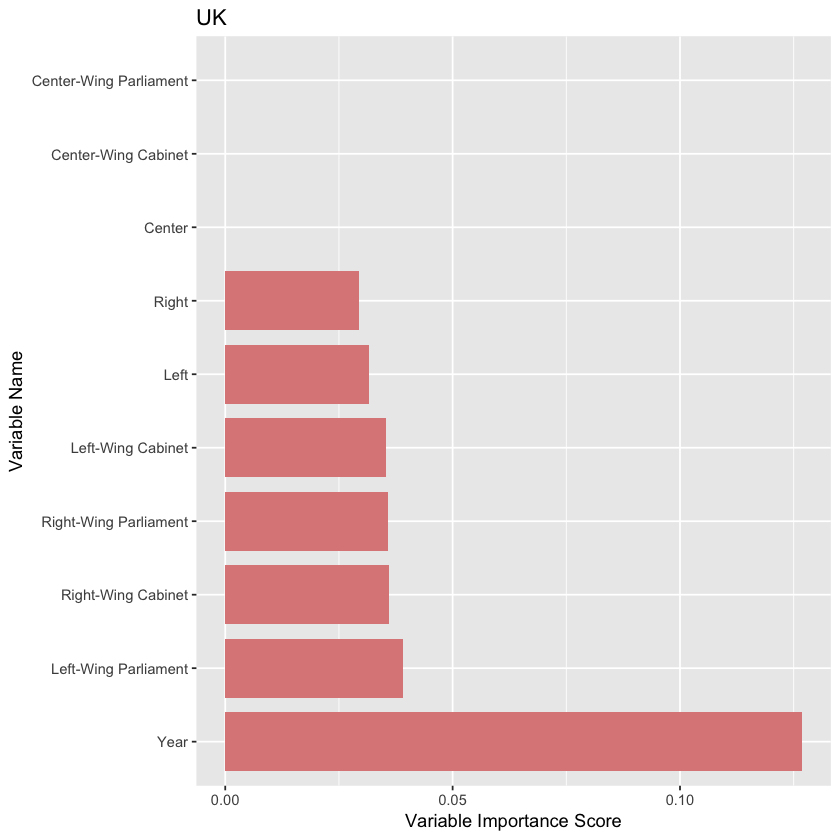

In [9]:
UKData <- filter(COMBINED_DATA, Country == 'UK')
glimpse(UKData)
n2 <- nrow(UKData) 
library(randomForest)
set.seed(1) 
test_idxUK <- sample.int(n2, size = round(0.1 * n2)) 
trainUK <- UKData[-test_idxUK, ] 
nrow(trainUK)
testUK <- UKData[test_idxUK, ]
nrow(testUK) 
library(mosaic)
mod_forestUK <- randomForest(PercentCount~gov_right1 + gov_right2 + Right + gov_left1 + gov_left2 + Left + 
                                gov_cent1 + gov_cent2 + Center + Year,
                                 data=trainUK, ntree=200, na.action = na.exclude, mtry = 3)
mod_forestUK
library(tibble)
importance(mod_forestUK)%>%
as.data.frame()%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))
df4 <- as.data.frame(importance(mod_forestUK))%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))
#ggplot(df1, aes(x= rowname, y= IncNodePurity))+
#geom_point()
df4$rowname[df4$rowname=="gov_left1"]<-"Left-Wing Cabinet"
df4$rowname[df4$rowname=="gov_left2"]<-"Left-Wing Parliament"
df4$rowname[df4$rowname=="gov_right1"]<-"Right-Wing Cabinet"
df4$rowname[df4$rowname=="gov_right2"]<-"Right-Wing Parliament"
df4$rowname[df4$rowname=="gov_cent1"]<-"Center-Wing Cabinet"
df4$rowname[df4$rowname=="gov_cent2"]<-"Center-Wing Parliament"

ggplot(df4, aes(x=reorder(rowname, -IncNodePurity), y=IncNodePurity))+
geom_bar(fill="#DD8888", width = 0.8, stat = "identity")+
coord_flip()+
ylab("Variable Importance Score")+
xlab("Variable Name")+ ggtitle("UK")

Observations: 56
Variables: 15
$ Year         <int> 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, ...
$ Country      <chr> "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA"...
$ Population   <int> 180671000, 183691000, 186538000, 189242000, 191889000,...
$ Type         <fctr> Refugees (incl. refugee-like situations), Refugees (i...
$ RefugeeCount <int> 500000, 500000, 500000, 500000, 500000, 510000, 500000...
$ PercentCount <dbl> 0.2767461, 0.2721962, 0.2680419, 0.2642120, 0.2605673,...
$ gov_right1   <dbl> 92.31, 11.12, 6.67, 6.74, 7.14, 14.20, 18.81, 18.75, 8...
$ gov_cent1    <dbl> 7.69, 88.88, 93.33, 93.26, 92.86, 85.80, 81.19, 81.25,...
$ gov_left1    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ gov_right2   <dbl> 100.00, 5.21, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00...
$ gov_cent2    <dbl> 0.00, 94.79, 100.00, 100.00, 100.00, 100.00, 100.00, 1...
$ gov_left2    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ Right        <dbl> 

[1] 50

[1] 6


Call:
 randomForest(formula = PercentCount ~ gov_right1 + gov_right2 +      Right + gov_left1 + gov_left2 + Left + gov_cent1 + gov_cent2 +      Center + Year, data = trainUSA, ntree = 200, mtry = 3, na.action = na.exclude) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 3

          Mean of squared residuals: 0.002442013
                    % Var explained: 54.45

rowname,IncNodePurity
Year,0.110963787
Right,0.027536964
Center,0.027425472
gov_cent1,0.023642690
gov_right1,0.019123760
gov_cent2,0.004738331
gov_right2,0.004336332
gov_left1,0.000000000
gov_left2,0.000000000
Left,0.000000000


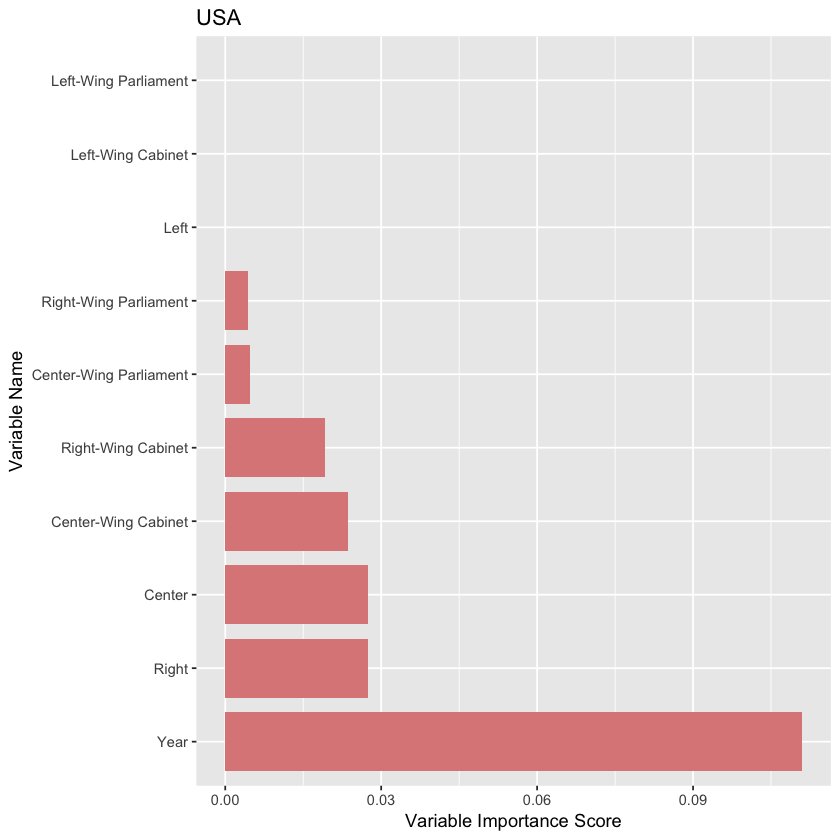

In [11]:
USAData <- filter(COMBINED_DATA, Country == 'USA')
glimpse(USAData)
n3 <- nrow(USAData) 
library(randomForest)
set.seed(5) 
test_idxUSA <- sample.int(n3, size = round(0.1 * n3)) 
trainUSA <- USAData[-test_idxUSA, ] 
nrow(trainUSA)
testUSA <- USAData[test_idxUSA, ]
nrow(testUSA) 
library(mosaic)
mod_forestUSA <- randomForest(PercentCount~gov_right1 + gov_right2 + Right + gov_left1 + gov_left2 + Left + 
                                gov_cent1 + gov_cent2 + Center + Year,
                                 data=trainUSA, ntree=200, na.action = na.exclude, mtry = 3)

mod_forestUSA
library(tibble)
importance(mod_forestUSA)%>%
as.data.frame()%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))
df5 <- as.data.frame(importance(mod_forestUSA))%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))
#ggplot(df1, aes(x= rowname, y= IncNodePurity))+
#geom_point()
df5$rowname[df5$rowname=="gov_left1"]<-"Left-Wing Cabinet"
df5$rowname[df5$rowname=="gov_left2"]<-"Left-Wing Parliament"
df5$rowname[df5$rowname=="gov_right1"]<-"Right-Wing Cabinet"
df5$rowname[df5$rowname=="gov_right2"]<-"Right-Wing Parliament"
df5$rowname[df5$rowname=="gov_cent1"]<-"Center-Wing Cabinet"
df5$rowname[df5$rowname=="gov_cent2"]<-"Center-Wing Parliament"
ggplot(df5, aes(x=reorder(rowname, -IncNodePurity), y=IncNodePurity))+
geom_bar(fill="#DD8888", width = 0.8, stat = "identity")+
coord_flip()+
ylab("Variable Importance Score")+
xlab("Variable Name") + ggtitle("USA")


[1] 50

[1] 6


Call:
 randomForest(formula = PercentCount ~ gov_right1 + gov_right2 +      Right + gov_left1 + gov_left2 + Left + gov_cent1 + gov_cent2 +      Center + Year + Right * Center * Left, data = trainCan, ntree = 200,      mtry = 3, na.action = na.exclude) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 3

          Mean of squared residuals: 0.01320759
                    % Var explained: 64.14

rowname,IncNodePurity
Year,0.80036311
gov_cent2,0.07420481
gov_right2,0.07409057
Right,0.07333493
gov_cent1,0.05879919
Center,0.05652676
gov_right1,0.04659820
gov_left1,0.00000000
gov_left2,0.00000000
Left,0.00000000


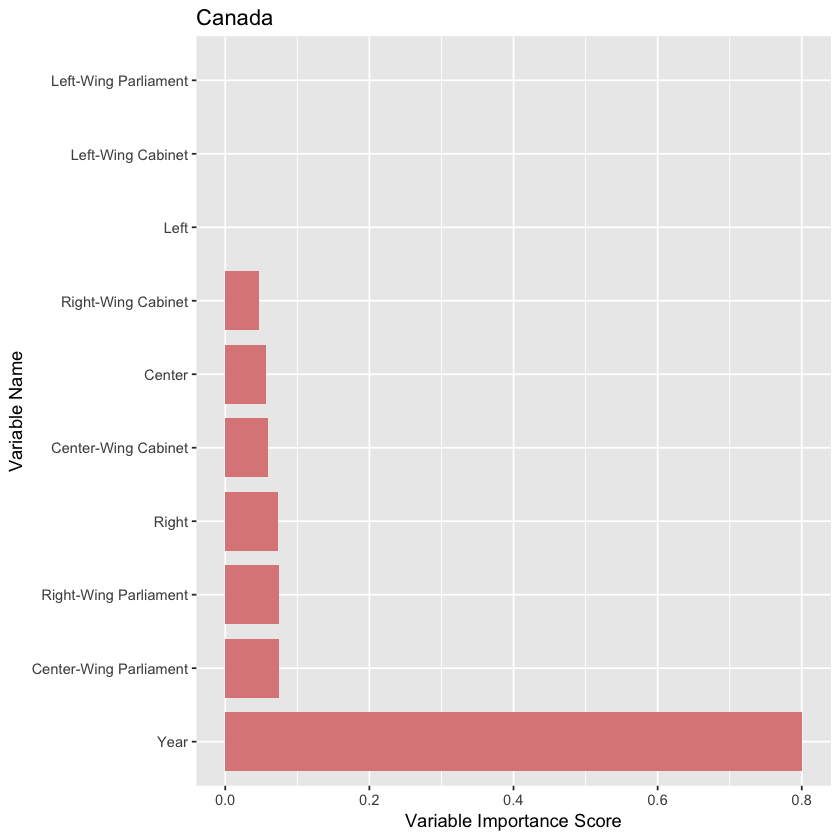

In [13]:
CanData <- filter(COMBINED_DATA, Country == 'Canada')
#glimpse(CanData)
n4 <- nrow(CanData) 
library(randomForest)
set.seed(21) 
test_idxCan <- sample.int(n4, size = round(0.1 * n4)) 
trainCan <- CanData[-test_idxCan, ] 
nrow(trainCan)
testCan <- CanData[test_idxCan, ]
nrow(testCan) 
library(mosaic)
mod_forestCan <- randomForest(PercentCount~gov_right1 + gov_right2 + Right + gov_left1 + gov_left2 + Left + 
                                gov_cent1 + gov_cent2 + Center + Year + Right*Center*Left,
                                 data=trainCan, ntree=200, na.action = na.exclude, mtry = 3)

mod_forestCan
library(tibble)
importance(mod_forestCan)%>%
as.data.frame()%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))

df3 <- as.data.frame(importance(mod_forestCan))%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))
#ggplot(df1, aes(x= rowname, y= IncNodePurity))+
#geom_point()
df3$rowname[df3$rowname=="gov_left1"]<-"Left-Wing Cabinet"
df3$rowname[df3$rowname=="gov_left2"]<-"Left-Wing Parliament"
df3$rowname[df3$rowname=="gov_right1"]<-"Right-Wing Cabinet"
df3$rowname[df3$rowname=="gov_right2"]<-"Right-Wing Parliament"
df3$rowname[df3$rowname=="gov_cent1"]<-"Center-Wing Cabinet"
df3$rowname[df3$rowname=="gov_cent2"]<-"Center-Wing Parliament"
ggplot(df3, aes(x=reorder(rowname, -IncNodePurity), y=IncNodePurity))+
geom_bar(fill="#DD8888", width = 0.8, stat = "identity")+
coord_flip()+
ylab("Variable Importance Score")+
xlab("Variable Name")+ ggtitle("Canada")

[1] 202

[1] 22

n= 202 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 202 51.06721000 0.45476910  
   2) Country=Canada,UK,USA 152  3.10662200 0.26999160  
     4) RefugeeCount< 88677 25  0.06616590 0.09170398 *
     5) RefugeeCount>=88677 127  2.08936500 0.30508750  
      10) Population>=4.412430e+07 96  0.84555680 0.25349240 *
      11) Population< 4.412430e+07 31  0.19684440 0.46486620 *
   3) Country=Sweden 50 26.99421000 1.01649300  
     6) RefugeeCount< 101267.5 29  2.93468600 0.46506630  
      12) RefugeeCount< 50539 20  0.05251240 0.25652860 *
      13) RefugeeCount>=50539 9  0.07961624 0.92848340 *
     7) RefugeeCount>=101267.5 21  3.06411800 1.77798700  
      14) RefugeeCount< 160957.5 14  0.32826060 1.55395300 *
      15) RefugeeCount>=160957.5 7  0.62782830 2.22605500 *


Call:
 randomForest(formula = PercentCount ~ gov_right1 + gov_right2 +      Right + gov_left1 + gov_left2 + Left + gov_cent1 + gov_cent2 +      Center + Year, data = train, ntree = 200, mtry = 3, na.action = na.exclude) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 3

          Mean of squared residuals: 0.1288119
                    % Var explained: 49.05

rowname,IncNodePurity
Year,11.149712
gov_left1,4.440630
gov_left2,4.429890
Left,4.025995
gov_cent2,2.883435
Center,2.416783
gov_right2,2.124995
gov_cent1,1.889065
Right,1.702568
gov_right1,1.580317


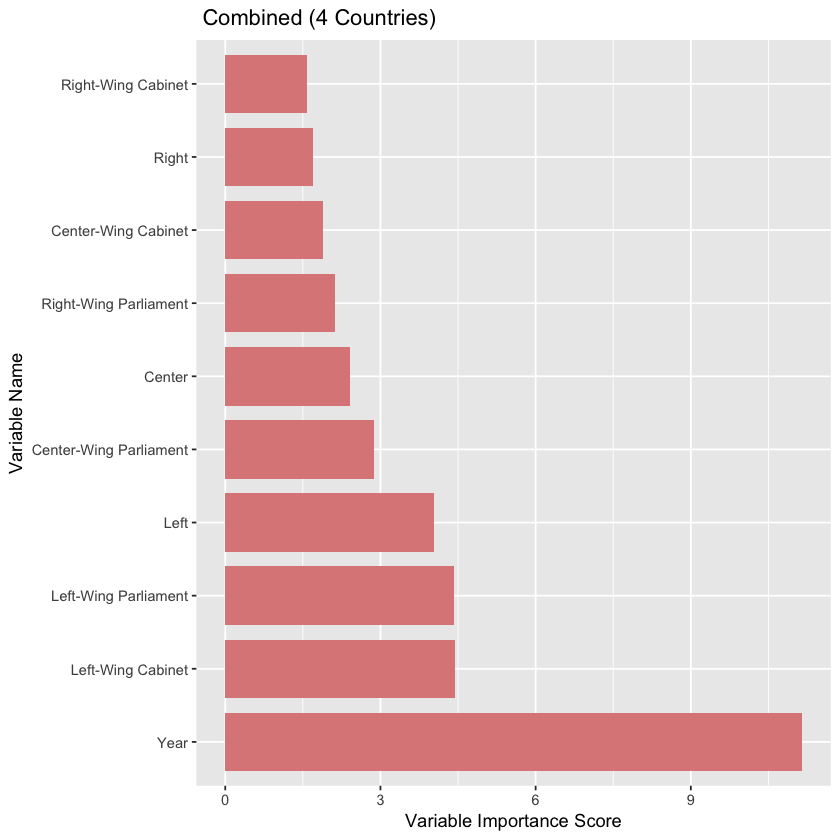

In [14]:
set.seed(364) 
n <- nrow(COMBINED_DATA) 
test_idx <- sample.int(n, size = round(0.1 * n)) 
train <- COMBINED_DATA[-test_idx, ] 
nrow(train)
test <-  COMBINED_DATA[test_idx, ]
nrow(test) 
library(mosaic)
#tally(~Count, data = train, format = "percent")
library(rpart) 
rpart(PercentCount ~ ., data = train)

library(randomForest)
mod_forestCombined <- randomForest(PercentCount~gov_right1 + gov_right2 + Right + gov_left1 + gov_left2 + Left + 
                                 gov_cent1 + gov_cent2 + Center + Year,
                                 data=train, ntree=200, na.action = na.exclude, mtry = 3)
mod_forestCombined
library(tibble)
importance(mod_forestCombined)%>%
as.data.frame()%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))
df1 <- as.data.frame(importance(mod_forestCombined))%>%
rownames_to_column()%>%
arrange(desc(IncNodePurity))
#ggplot(df1, aes(x= rowname, y= IncNodePurity))+
#geom_point()
df1$rowname[df1$rowname=="gov_left1"]<-"Left-Wing Cabinet"
df1$rowname[df1$rowname=="gov_left2"]<-"Left-Wing Parliament"
df1$rowname[df1$rowname=="gov_right1"]<-"Right-Wing Cabinet"
df1$rowname[df1$rowname=="gov_right2"]<-"Right-Wing Parliament"
df1$rowname[df1$rowname=="gov_cent1"]<-"Center-Wing Cabinet"
df1$rowname[df1$rowname=="gov_cent2"]<-"Center-Wing Parliament"
ggplot(df1, aes(x=reorder(rowname, -IncNodePurity), y=IncNodePurity))+
geom_bar(fill="#DD8888", width = 0.8, stat = "identity")+
coord_flip()+
ylab("Variable Importance Score")+
xlab("Variable Name") + ggtitle(" Combined (4 Countries)")